# Task B: Data Preprocessing

## 1. Preprocess the label file of MRI dataset

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Read label (.csv file) of dataset.
label_csv = pd.read_csv('.\dataset\label.csv')

# Print basic information of label, notice that it contains 4 classes based on tumor type. 
print(label_csv.info(), '\n')
print(label_csv.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  3000 non-null   object
 1   label      3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB
None 

        file_name             label
0  IMAGE_0000.jpg  meningioma_tumor
1  IMAGE_0001.jpg          no_tumor
2  IMAGE_0002.jpg  meningioma_tumor
3  IMAGE_0003.jpg      glioma_tumor
4  IMAGE_0004.jpg  meningioma_tumor


In [3]:
# For binary task classification, we simply use "0" and "1" to indicate and identify whether there is a tumor in the MRI images. 
label_csv['new'] = 0
label_csv['new'][label_csv['label']=='glioma_tumor'] = 1
label_csv['new'][label_csv['label']=='meningioma_tumor'] = 2
label_csv['new'][label_csv['label']=='pituitary_tumor'] = 3

# Check result.
label_csv.head()

C:\Users\16967\.conda\envs\AMLS_Lab\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\16967\.conda\envs\AMLS_Lab\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\16967\.conda\envs\AMLS_Lab\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,file_name,label,new
0,IMAGE_0000.jpg,meningioma_tumor,2
1,IMAGE_0001.jpg,no_tumor,0
2,IMAGE_0002.jpg,meningioma_tumor,2
3,IMAGE_0003.jpg,glioma_tumor,1
4,IMAGE_0004.jpg,meningioma_tumor,2


In [4]:
# Transfer label into array dataformat.
label_TaskB = np.array(label_csv['new']).astype('uint8')

# Check result.
label_TaskB.shape, label_TaskB.dtype

((3000,), dtype('uint8'))

## 2. Preprocess MRI images

In [5]:
# Import necessary libraries
import cv2
from glob import glob

In [6]:
# Read 3000 512x512 pixel gray-scale MRI images
images = [cv2.imread(image, cv2.IMREAD_GRAYSCALE) 
          for image in glob('dataset/image/*.jpg')]

# Median filter is used to remove noise from the MRI images. 
images_blur = [cv2.medianBlur(images[i], 5)
               for i in range(0, len(images))]

### Uncomment the following code to check filtered MRI image.
# cv2.imshow('MRI Image After Median Filter Test', images_blur[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

images_adjusted = [cv2.convertScaleAbs(images_blur[i], alpha=alpha, beta=beta)
                   for i in range(0, len(images))]
                    
# cv2.imshow('MRI Image After Median Filter Test', images_adjusted[100])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [8]:
# images_thresh = images_blur

# for i in range(0, len(images)):
#     x, images_thresh[i] = cv2.threshold(images_adjusted[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# images_normlize = [cv2.normalize(images_thresh[i], None, alpha=0,beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
#                    for i in range(0, len(images))]
    
images_normlize = [cv2.normalize(images_adjusted[i], None, alpha=0,beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
                   for i in range(0, len(images))]

### Uncomment the following code to check filtered MRI image.
cv2.imshow('MRI Image After Median Filter Test', images_normlize[5])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
resize = 128

images_resized = [cv2.resize(images_normlize[i], (resize,resize))
                  for i in range(0, len(images))]


# images_resized = [cv2.resize(images_normlize[i], (resize,resize))
#                   for i in range(0, len(images))]

In [13]:
# from skimage.feature import greycomatrix, greycoprops
# feats = np.zeros((3000,72))

# for i in range(0, len(images)):
#     distances = [1, 2, 3]
#     angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
#     properties = ['contrast', 'energy','homogeneity','correlation','dissimilarity','ASM']

#     glcm = greycomatrix(images_thresh[i], distances=distances, angles=angles, symmetric=True, normed=True)
#     feats[i] = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])  

In [10]:
# Transfer images into array dataformat.
images_TaskB = np.array(images_resized)

# Print image infotmation
print('{} images with {}x{} pixel. \n'.format(images_TaskB.shape[0], 
                                              images_TaskB.shape[1], 
                                              images_TaskB.shape[2]))

# Vectorize images. 
images_TaskB = images_TaskB.reshape((3000, resize*resize))

# Print vectorized image information
print('After vectorization')
print('{} vectorized images with {} pixel.'.format(images_TaskB.shape[0], 
                                                          images_TaskB.shape[1]))

3000 images with 128x128 pixel. 

After vectorization
3000 vectorized images with 16384 pixel.


In [6]:
img_sk = [cv2.imread(image) 
          for image in glob('dataset/image/*.jpg')]
gray_sk = [cv2.cvtColor(img_sk[i],cv2.COLOR_BGR2GRAY)
           for i in range(0, len(img_sk))]   

# img_sk = [cv2.medianBlur(img_sk[i], 5)
#           for i in range(0, len(img_sk))]

# gray_sk = [cv2.medianBlur(gray_sk[i], 5)
#            for i in range(0, len(img_sk))]

In [20]:
img_brainout = img_sk
for i in range(109, len(img_sk)):  
    print(i)
    
    ret, thresh = cv2.threshold(gray_sk[i],0,255,cv2.THRESH_OTSU)

    colormask = np.zeros(img_sk[i].shape, dtype=np.uint8)
    colormask[thresh!=0] = np.array((0,0,255))
    blended = cv2.addWeighted(img_sk[i],0.7,colormask,0.1,0)

    ret, markers = cv2.connectedComponents(thresh)

    #Get the area taken by each component. Ignore label 0 since this is the background.
    marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
    
    #Get label of largest component by area
    largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above 
    
    #Get pixels which correspond to the brain
    brain_mask = markers==largest_component

    brain_out = img_sk[i].copy()
    #In a copy of the original image, clear those pixels that don't correspond to the brain
    brain_out[brain_mask==False] = (0,0,0)
    
    img_brainout[i] = brain_out


109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


ValueError: attempt to get argmax of an empty sequence

In [18]:
img_withoutSK = skull_out(img_sk_blur, gray_sk_blur)


# cv2.imshow('MRI Image Test', img_withoutSK[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

0
1
2


ValueError: attempt to get argmax of an empty sequence

In [18]:
img = cv2.imread('dataset/image/IMAGE_0109.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

colormask = np.zeros(img.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255))
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)

ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)

cv2.imshow('MRI Image Test', brain_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3. Data dimensionality reduction and denoising by using PCA

### A simple test by using SVM

In [91]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data into a training set and a test set (90% training and 10% testing data).
# Notice that all random state is chosen as 0 in this assignment to ensure reproducibility.
X_train, X_test, y_train, y_test = train_test_split(images_TaskB,label_TaskB, 
                                                    test_size=0.1, random_state=0)

# Check result.
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((2700, 16384), (2700,), (300, 16384), (300,))

In [12]:
# Call the SVC() model from sklearn and fit the model to the training data.
svm_test = SVC(C=1, decision_function_shape='ovo')
svm_test.fit(X_train, y_train)

# Get predictions from the model.
pred_test = svm_test.predict(X_test)

# Check the accuracy score.
print('Accuracy score:', accuracy_score(y_test,pred_test))

Accuracy score: 0.8966666666666666


### PCA

In [92]:
# Import necessary libraries
from sklearn.decomposition import PCA

# Call the PCA() model from sklearn and fit the model to the training data.
# In this example, we want to oberserve the top 500 principal components of data.
pca_test = PCA(n_components=300)
pca_test.fit(images_TaskB)

PCA(n_components=300)

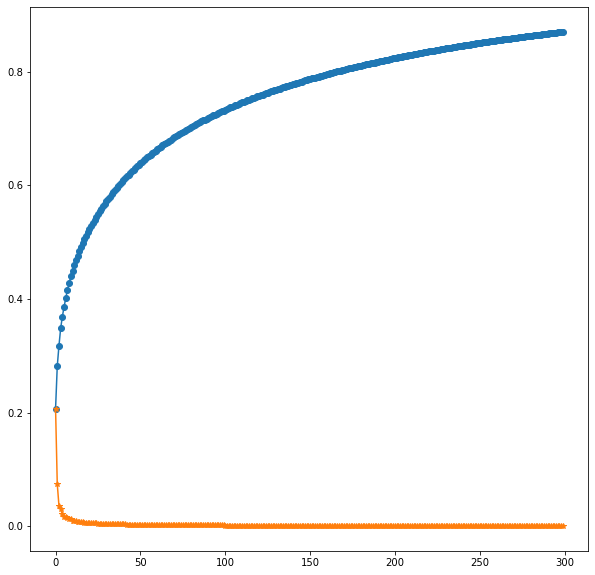

In [93]:
import matplotlib.pyplot as plt

n_components = 300

variance_ratio = pca_test.explained_variance_ratio_
variance_ratio_cum = variance_ratio.cumsum()

plt.figure(figsize=(10,10))
plt.plot(variance_ratio_cum[:n_components], 'o-')
plt.plot(variance_ratio[:n_components], '*-')


# fig, axes = plt.subplots(2,1 figsize = (12,3))

# # default grid appearance
# axes[0].plot(x_cum[:k], 'o-', lw=2)
# axes[0].grid()

# # custom grid appearance
# axes[1].plot(x[:k], '*-', lw=2)
# axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

In [117]:
from sklearn.decomposition import PCA

# Call the PCA() model from sklearn and fit the model to the training data.
# Notice that
pca_TaskB = PCA(n_components=100)
images_PCA = pca_TaskB.fit_transform(images_TaskB)

In [120]:
# Split data into a training set and a test set (90% training and 10% testing data).
# Notice that all random state is chosen as 0 in this assignment to ensure reproducibility.
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(images_PCA,label_TaskB, 
                                                                    test_size=0.1, random_state=0)

# Check result.
print(X_train_PCA.shape, y_train_PCA.shape, X_test_PCA.shape, y_test_PCA.shape) 
print('train set: {}  | test set: {}'.format(round(len(y_train_PCA)/len(images_PCA),3), 
                                             round(len(y_test_PCA)/len(images_PCA),3)))

(2700, 100) (2700,) (300, 100) (300,)
train set: 0.9  | test set: 0.1


In [125]:
# Call the SVC() model from sklearn and fit the model to the training data.
svm_PCA = SVC(C=10)
svm_PCA.fit(X_train_PCA, y_train_PCA)

# Get predictions from the model.
pred_PCA = svm_PCA.predict(X_test_PCA)

# Check the accuracy score.
print('Accuracy score:', accuracy_score(y_test_PCA,pred_PCA))

Accuracy score: 0.96


## 4. Save preprocessed data

In [22]:
# Import necessary libraries
import pickle

In [44]:
# Generate new data array of preprocessed data.
# images_AfterProcess = images_PCA.copy()
images_AfterProcess = images_TaskB.copy()
label_AfterProcess = label_TaskB.copy()

# Check preprocessed data.
images_AfterProcess.shape, label_AfterProcess.shape

((3000, 4096), (3000,))

In [45]:
# Save preprocessed data with help of pickle.
with open('DataAfterProcess/images_AfterProcess.pickle', 'wb') as handle:
    pickle.dump(images_AfterProcess, handle)
    
with open('DataAfterProcess/label_AfterProcess.pickle', 'wb') as handle:
    pickle.dump(label_AfterProcess, handle)

In [46]:
# Save variance_ratio data generated by PCA process of images with help of pickle.
with open('DataBackUp/variance_ratio.pickle', 'wb') as handle:
    pickle.dump(variance_ratio, handle)

In [26]:
with open('DataAfterProcess/label_AfterProcess.pickle', 'wb') as handle:
    pickle.dump(label_TaskA, handle)

NameError: name 'label_TaskA' is not defined